In [1]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from matplotlib.pyplot import figure, draw, pause, gca
%matplotlib inline

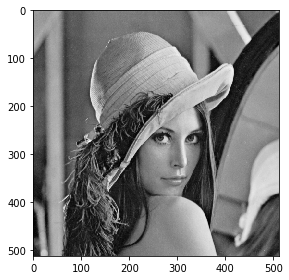

In [87]:
lena = io.imread("./lena.bmp").astype("float")

plt.imshow(lena, cmap="gray")
plt.tight_layout()
plt.show()

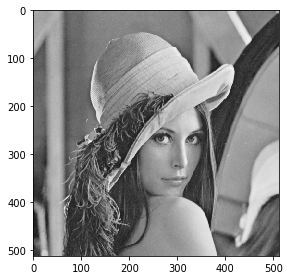

In [50]:
lena_ = io.imread("./lena_shift.bmp").astype("float")

plt.imshow(lena_, cmap="gray")
plt.tight_layout()
plt.show()

array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,  162.,  162., ...,  171.,  170.,  155.],
       [   0.,  162.,  162., ...,  171.,  170.,  155.],
       ..., 
       [   0.,   46.,   46., ...,  100.,  102.,   98.],
       [   0.,   43.,   43., ...,  100.,  104.,  100.],
       [   0.,   44.,   44., ...,  100.,  104.,  105.]])

In [88]:
lena_ = np.hstack((np.zeros((512,1)),lena))
lena_ = np.vstack((np.zeros((1,513)),lena_))

In [89]:
lena_shift = lena_[:512,:512]

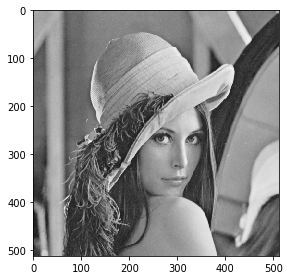

In [90]:
plt.imshow(lena_shift, cmap="gray")
plt.tight_layout()
plt.show()

In [47]:
arr=np.array(lena_shift,dtype='uint8')
arr=Image.fromarray(arr)
#第一个参数为存储的地址和名称，第二个参数为存储的图片类型
arr.save('lena_shift.bmp','bmp')

In [135]:
from scipy.ndimage.filters import convolve as filter2
import numpy as np
from typing import Tuple
#
HSKERN = np.array([[1/12, 1/6, 1/12],
                   [1/6,    0, 1/6],
                   [1/12, 1/6, 1/12]], float)

kernelX = np.array([[-1, 1],
                    [-1, 1]]) * .25  # kernel for computing d/dx

kernelY = np.array([[-1, -1],
                    [1, 1]]) * .25  # kernel for computing d/dy

kernelT = np.ones((2, 2))*.25


def HornSchunck(im1, im2, lam=1, Niter=8, verbose=False):
    """
    im1: image at t=0
    im2: image at t=1
    lam: smoothness
    Niter: number of iteration
    """
    im1 = im1.astype(np.float32)
    im2 = im2.astype(np.float32)

    # set up initial velocities
    uInitial = np.zeros([im1.shape[0], im1.shape[1]])
    vInitial = np.zeros([im1.shape[0], im1.shape[1]])

    # Set initial value for the flow vectors
    U = uInitial
    V = vInitial

    # Estimate derivatives
    [fx, fy, ft] = computeDerivatives(im1, im2)

    if verbose:
        from .plots import plotderiv
        plotderiv(fx, fy, ft)

#    print(fx[100,100],fy[100,100],ft[100,100])

        # Iteration to reduce error
    for _ in range(Niter):
        # %% Compute local averages of the flow vectors
        uAvg = filter2(U, HSKERN)
        vAvg = filter2(V, HSKERN)
# %% common part of update step
        der = (fx*uAvg + fy*vAvg + ft) / (1+ lam*(fx**2 + fy**2))
# %% iterative step
        U = uAvg - fx * der
        V = vAvg - fy * der

    return U, V


def computeDerivatives(im1, im2):

    fx = filter2(im1, kernelX) + filter2(im2, kernelX)
    fy = filter2(im1, kernelY) + filter2(im2, kernelY)

    # ft = im2 - im1
    ft = filter2(im1, kernelT) + filter2(im2, -kernelT)

    return fx, fy, ft

def compareGraphs(u, v, Inew, scale=5, quivstep=5, lam=10):

    ax = figure(figsize=(16,16)).gca()
    ax.imshow(Inew, cmap='gray')
    # plt.scatter(POI[:,0,1],POI[:,0,0])
    for i in range(0, u.shape[0], quivstep):
        for j in range(0, v.shape[1], quivstep):
            ax.arrow(j, i, v[i, j]*scale, u[i, j]*scale, color='red',
                     head_width=3, head_length=1,width=0.0001)
    ax.set_title("Lambda:{}".format(lam))
    draw()
#     pause(0.01)

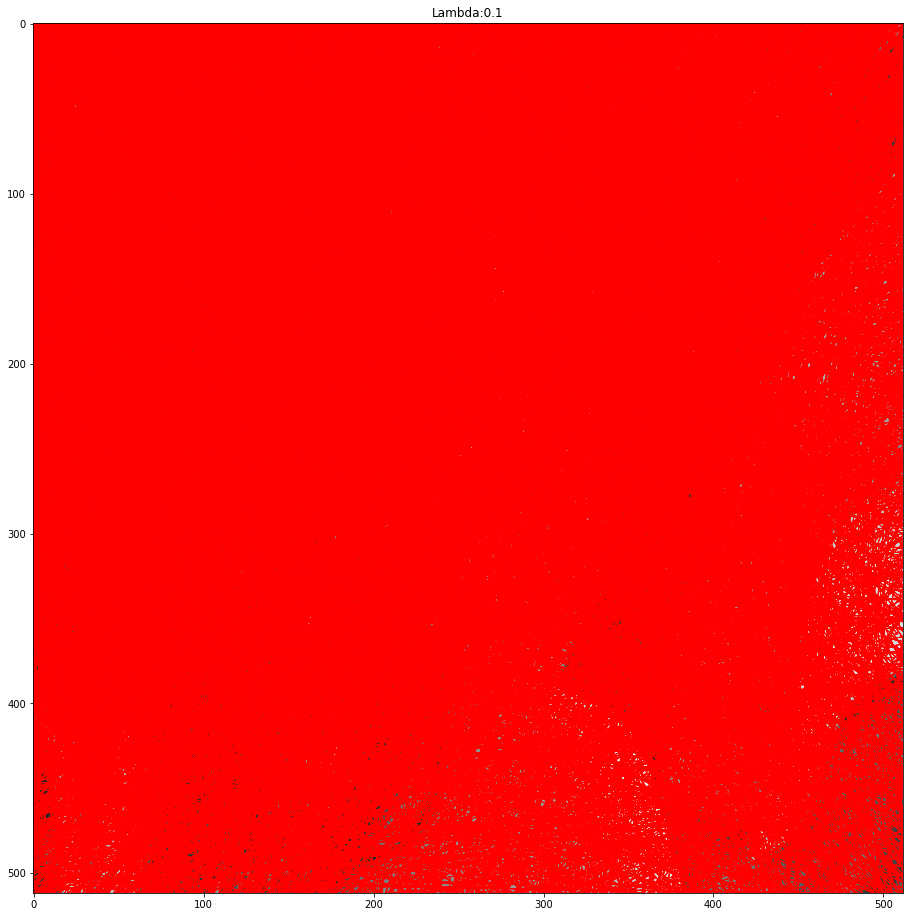

In [136]:
lam = 0.1
U, V = HornSchunck(lena, lena_shift, lam=lam)

compareGraphs(U, V, lena_shift,lam=lam)

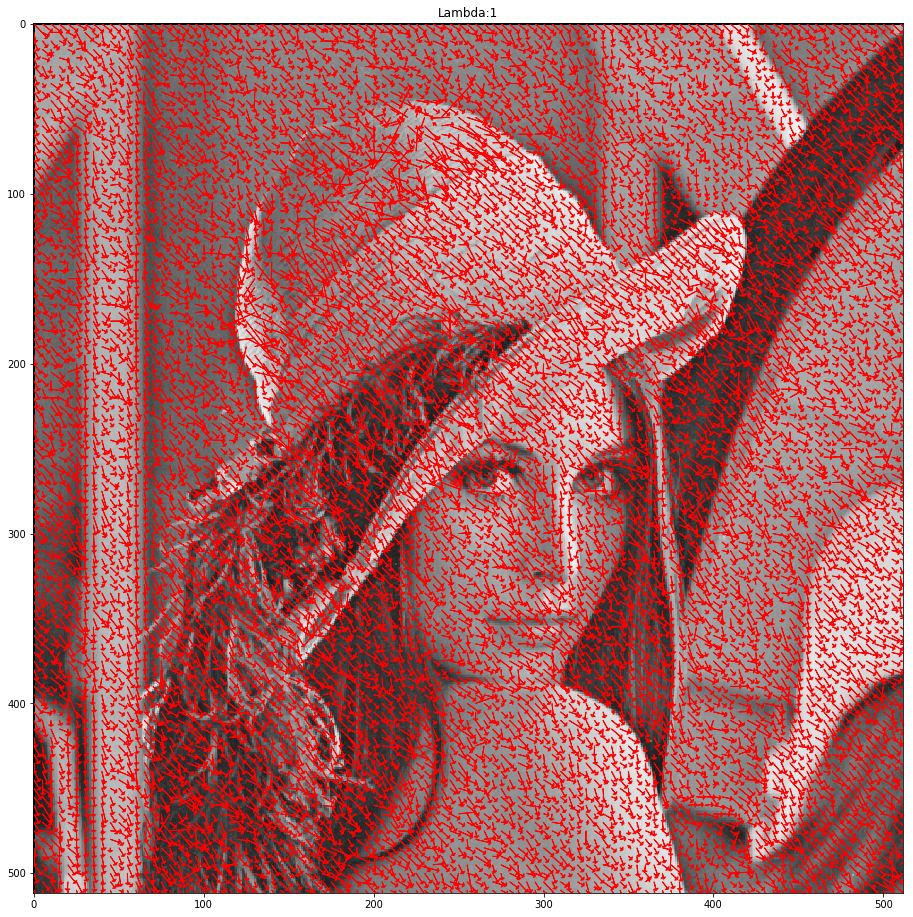

In [137]:
lam = 1
U, V = HornSchunck(lena, lena_shift, lam=lam)

compareGraphs(U, V, lena_shift,lam=lam)

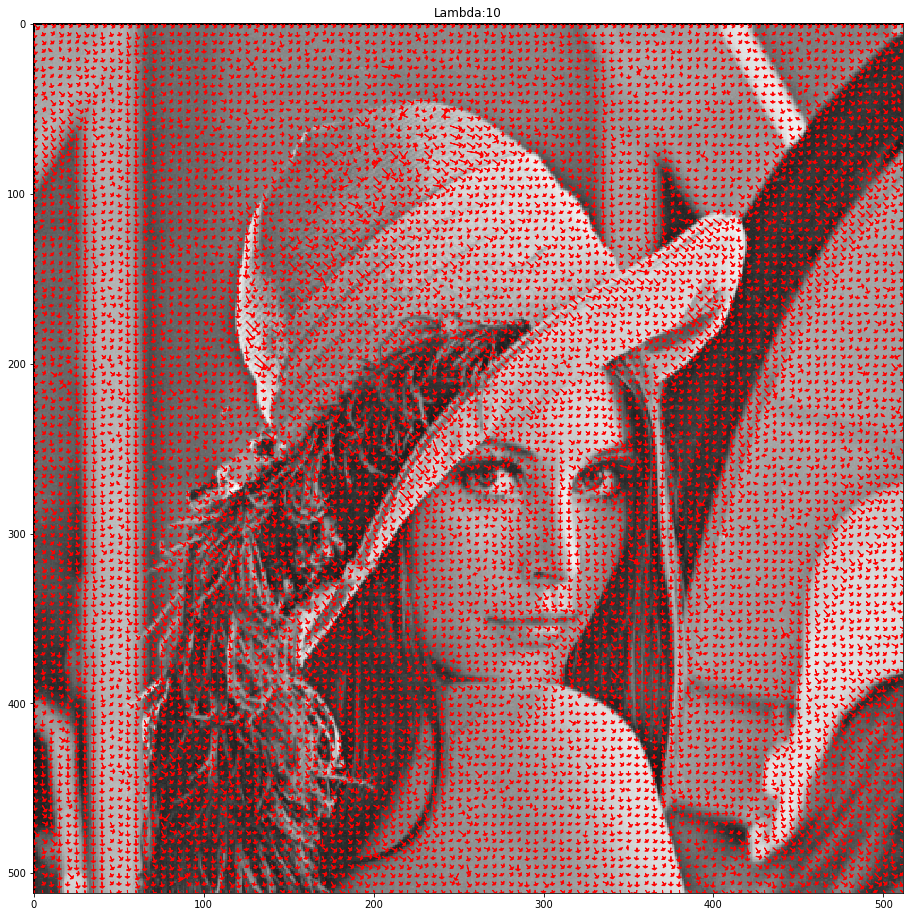

In [138]:
lam = 10
U, V = HornSchunck(lena, lena_shift, lam=lam)

compareGraphs(U, V, lena_shift,lam=lam)

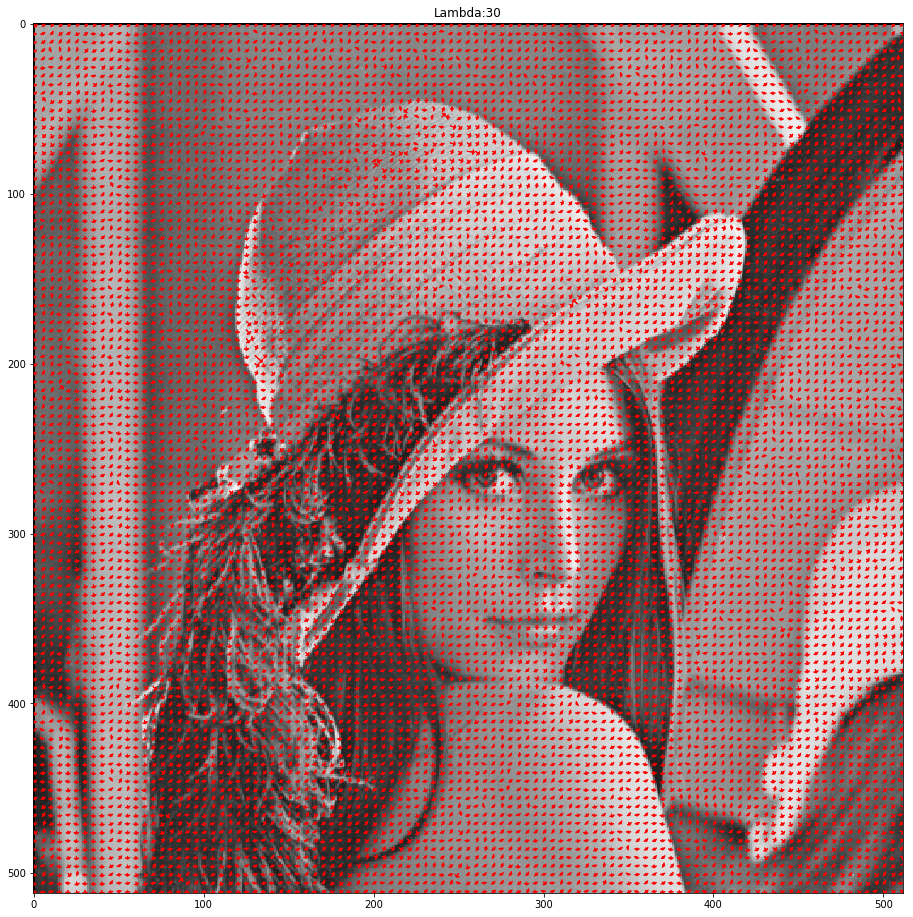

In [139]:
lam = 30
U, V = HornSchunck(lena, lena_shift, lam=lam)

compareGraphs(U, V, lena_shift,lam=lam)